In [1]:
from openfe_benchmarks import tyk2
from openfe.setup.atom_mapping.perses_mapper import PersesAtomMapper

/home/bioc1523/software/anaconda/install/envs/openfe-benchmarks/lib/python3.9/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/bioc1523/software/anaconda/install/envs/openfe-benchmarks/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/bioc1523/software/anaconda/install/envs/openfe-benchmarks/lib/python3.9/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/bioc1523/software/anaconda/install/envs/openfe-benchmarks/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is z

In [5]:
system = tyk2.get_old_system()

In [6]:
perses_system = tyk2.get_old_system(mappers=[PersesAtomMapper(),])

In [7]:
perses_edges = [edge for edge in perses_system.ligand_network.edges]

In [8]:
edges = [edge for edge in system.ligand_network.edges]

In [9]:
from openfe_benchmarks.utils import show_edge_3D
from ipywidgets import interact, widgets

def display_edge(index):
    view = show_edge_3D(edges[index], spheres=True, shift=(0.1, 0, 0))
    view.show()

In [12]:
interact(display_edge, index=widgets.IntSlider(min=0,max=23,step=1));

interactive(children=(IntSlider(value=0, description='index', max=23), Output()), _dom_classes=('widget-intera…

In [11]:
from openfe_benchmarks.utils import show_edge_3D

show_edge_3D(edges[21], spheres=True, shift=(1,0,0))

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

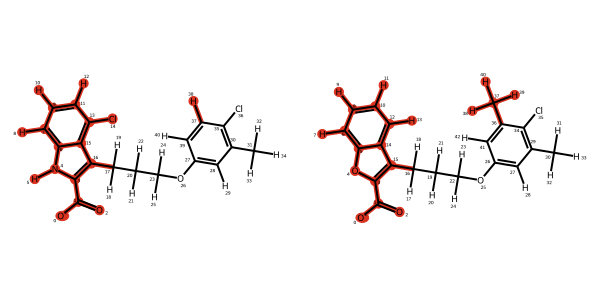

In [23]:
edges[24]

In [24]:
edges[24]._compA_to_compB

{17: 16,
 18: 17,
 19: 18,
 20: 19,
 21: 20,
 22: 21,
 23: 22,
 24: 23,
 25: 24,
 26: 25,
 27: 26,
 28: 27,
 29: 28,
 30: 29,
 31: 30,
 32: 32,
 33: 31,
 34: 33,
 35: 34,
 36: 35,
 37: 36,
 39: 41,
 40: 42}

In [ ]:
edges[24]._compA_to_compB[32] = 31
edges[24]._compA_to_compB[33] = 32

In [5]:
from openfe.setup.methods.openmm.equil_rbfe_methods import RelativeLigandTransform
from openff.units import unit

settings = RelativeLigandTransform.get_default_settings()

settings.simulation_settings.equilibration_length = 1000 * unit.picosecond
settings.simulation_settings.production_length = 5000 * unit.picosecond

In [6]:
import pprint
pprint.pprint(settings)

RelativeLigandTransformSettings(system_settings=SystemSettings(constraints='HBonds', hydrogen_mass=None, nonbonded_method='PME', nonbonded_cutoff=<Quantity(1.0, 'nanometer')>, rigid_water=True, remove_com=True), topology_settings=TopologySettings(forcefield={'protein': 'amber99sb.xml', 'ligand': 'openff-2.0.0.offxml', 'solvent': 'tip3p.xml'}, solvent_model='tip3p'), alchemical_settings=AlchemicalSettings(lambda_functions='default', lambda_windows=11, unsampled_endstates=False, use_dispersion_correction=False, softcore_LJ_v2=True, softcore_electrostatics=True, softcore_alpha=0.85, softcore_electrostatics_alpha=0.3, softcore_sigma_Q=1.0, interpolate_old_and_new_14s=False, flatten_torsions=False), integrator_settings=IntegratorSettings(timestep=<Quantity(2, 'femtosecond')>, temperature=<Quantity(298.15, 'kelvin')>, collision_rate=<Quantity(1, '1 / picosecond')>, n_steps=<Quantity(1000, 'timestep')>, reassign_velocities=True, splitting='V R O R V', n_restart_attempts=20, constraint_toleran

In [7]:
import copy
from openfe import ChemicalSystem

solvent_transforms = []

for edge in edges:
    stateA = ChemicalSystem({'ligand': edge.molA,
                             'solvent': tyk2_system.solvent_component})
    stateB = ChemicalSystem({'ligand': edge.molB,
                             'solvent': tyk2_system.solvent_component})
    simset = copy.deepcopy(settings)
    simset.simulation_settings.output_filename = f"{edge.molA.name}_{edge.molB.name}_solvent.nc"
    simset.simulation_settings.checkpoint_storage = f"{edge.molA.name}_{edge.molB.name}_solvent_checkpoint.nc"
    transform = RelativeLigandTransform(
        stateA=stateA, stateB=stateB, ligandmapping=edge,
        settings=simset
    )
    solvent_transforms.append(transform)

In [8]:
import copy
from openfe import ChemicalSystem

complex_transforms = []

for edge in edges:
    stateA = ChemicalSystem({'ligand': edge.molA,
                             'solvent': tyk2_system.solvent_component,
                             'protein': tyk2_system.protein_component})
    stateB = ChemicalSystem({'ligand': edge.molB,
                             'solvent': tyk2_system.solvent_component,
                             'protein': tyk2_system.protein_component})
    simset = copy.deepcopy(settings)
    simset.simulation_settings.output_filename = f"{edge.molA.name}_{edge.molB.name}_complex.nc"
    simset.simulation_settings.checkpoint_storage = f"{edge.molA.name}_{edge.molB.name}_complex_checkpoint.nc"
    transform = RelativeLigandTransform(
        stateA=stateA, stateB=stateB, ligandmapping=edge,
        settings=simset
    )
    complex_transforms.append(transform)

In [ ]:
#NBVAL_IGNORE_OUTPUT
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [ ]:
#NBVAL_IGNORE_OUTPUT
#solvent_transforms[2].run(verbose=True)

for sim in solvent_transforms:
    sim.run(dry=True, verbose=True)

In [ ]:
#NBVAL_IGNORE_OUTPUT
complex_transforms[2].run(verbose=True)